In [1]:
# # CNN FINETUNING WITH PRE-TRAINED VGG NET - Small Training Size
%matplotlib inline
import os
import numpy as np
import load_fmri_alff_dottest_transferlearning_axis as input_data
import matplotlib.pyplot as plt
import scipy.misc
import scipy.io
#from tensorflow.examples.tutorials.mnist import input_data

# Load Data
fmri = input_data.read_data_sets("../data/AllSubjects4cat.hdf5", fraction=1, channels=1)
trainimg   = fmri.train.images
trainlabel = fmri.train.labels
testimg    = fmri.test.images
testlabel  = fmri.test.labels
ntrain      = trainimg.shape[0]
ntest       = testimg.shape[0]
dim         = trainimg.shape[1]
nout        = trainlabel.shape[1]

print ("%d train images loaded" % (ntrain))
print ("%d test images loaded" % (ntest))
print ("%d dimensional input" % (dim))
# print ("%d classes" % (nclass))
print ("shape of 'trainimg' is %s" % (trainimg.shape,))
print ("shape of 'testimg' is %s" % (testimg.shape,))

print (trainlabel.shape)

Loading Training Imagery...
.....................
Loading Test Imagery...
.......204 train images loaded
69 test images loaded
10800 dimensional input
shape of 'trainimg' is (204, 10800)
shape of 'testimg' is (69, 10800)
(204, 2)


In [2]:
img = np.reshape(testimg[9],(60,60,3) )
np.max(img[:,:,0])

1.0

In [4]:
import png

(-0.5, 59.5, 59.5, -0.5)

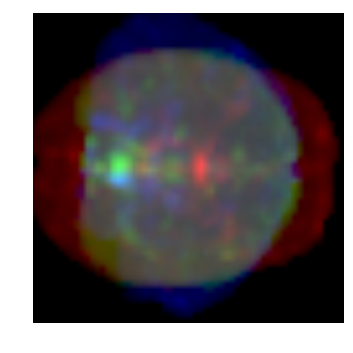

In [5]:
img = np.reshape(testimg[27],(60,60,3) )
plt.imshow(img[:,:,:])
plt.axis("off")

In [19]:
f = open('test.png', 'wb')
w = png.Writer(60, 60)

w.write(f, np.reshape(testimg[27]*255,(-1,60*3) ) )

f.close()

In [21]:
for i,img in enumerate(trainimg):
    if trainlabel[i][0]:
        f = open('./img/asd/tr'+str(i)+'.png', 'wb')
        w.write(f, np.reshape(img*255,(-1,60*3) ) )
        f.close()
        print("ASD")
    else:
        f = open('./img/typ/tr'+str(i)+'.png', 'wb')
        w.write(f, np.reshape(img*255,(-1,60*3) ) )
        f.close()
        print("TYP")

ASD
TYP
ASD
TYP
ASD
TYP
ASD
ASD
TYP
ASD
ASD
ASD
TYP
ASD
ASD
TYP
ASD
TYP
ASD
TYP
TYP
ASD
ASD
TYP
ASD
TYP
TYP
ASD
ASD
TYP
ASD
ASD
TYP
ASD
ASD
ASD
TYP
ASD
TYP
TYP
ASD
TYP
TYP
TYP
TYP
ASD
ASD
ASD
ASD
TYP
ASD
TYP
TYP
ASD
TYP
ASD
TYP
ASD
ASD
ASD
TYP
ASD
TYP
TYP
ASD
TYP
ASD
ASD
TYP
ASD
TYP
TYP
ASD
ASD
TYP
TYP
ASD
TYP
ASD
TYP
TYP
ASD
ASD
TYP
TYP
TYP
ASD
ASD
TYP
TYP
TYP
ASD
ASD
ASD
TYP
ASD
ASD
ASD
TYP
ASD
TYP
ASD
TYP
TYP
TYP
ASD
ASD
TYP
TYP
ASD
TYP
ASD
ASD
ASD
TYP
ASD
ASD
ASD
ASD
TYP
TYP
TYP
TYP
TYP
ASD
ASD
TYP
TYP
ASD
TYP
ASD
TYP
TYP
TYP
TYP
TYP
ASD
ASD
TYP
ASD
TYP
TYP
ASD
ASD
ASD
TYP
ASD
TYP
TYP
ASD
ASD
ASD
ASD
TYP
ASD
TYP
ASD
TYP
TYP
TYP
TYP
ASD
TYP
TYP
TYP
TYP
TYP
ASD
TYP
ASD
ASD
ASD
TYP
ASD
TYP
TYP
TYP
TYP
TYP
TYP
TYP
ASD
TYP
TYP
ASD
TYP
ASD
ASD
TYP
TYP
TYP
TYP
ASD
ASD
TYP
ASD
ASD
ASD
ASD
TYP
TYP
ASD
TYP
ASD


In [22]:
for i,img in enumerate(testimg):
    if trainlabel[i][0]:
        f = open('./img/asd/ts'+str(i)+'.png', 'wb')
        w.write(f, np.reshape(img*255,(-1,60*3) ) )
        f.close()
        print("ASD")
    else:
        f = open('./img/typ/ts'+str(i)+'.png', 'wb')
        w.write(f, np.reshape(img*255,(-1,60*3) ) )
        f.close()
        print("TYP")

ASD
TYP
ASD
TYP
ASD
TYP
ASD
ASD
TYP
ASD
ASD
ASD
TYP
ASD
ASD
TYP
ASD
TYP
ASD
TYP
TYP
ASD
ASD
TYP
ASD
TYP
TYP
ASD
ASD
TYP
ASD
ASD
TYP
ASD
ASD
ASD
TYP
ASD
TYP
TYP
ASD
TYP
TYP
TYP
TYP
ASD
ASD
ASD
ASD
TYP
ASD
TYP
TYP
ASD
TYP
ASD
TYP
ASD
ASD
ASD
TYP
ASD
TYP
TYP
ASD
TYP
ASD
ASD
TYP
